In [1]:
import pandas as pd
import numpy as np

import re
import unicodedata
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sns.set_palette("Blues")

# Acquire the Data

In [2]:
dw = pd.read_csv('dw.csv')
dw.head()

,Unnamed: 0,repo,language,readme_contents
0,0,eccentricdevotion/TARDIS,Java,# TARDIS\n\nTARDIS is a Spigot / Paper plugin ...
1,1,kuralabs/reactive-core-doctor-who-web,JavaScript,==============================================...
2,2,fwallacephd/doctor-who,CSS,Notes about open source Doctor Who Project:\n\...
3,3,kuralabs/reactive-core-doctor-who-core,JavaScript,==============================================...
4,4,kuralabs/reactive-core-doctor-who-mobile,JavaScript,==============================================...


In [3]:
dw = prepare.drop_nulls(dw)

In [4]:
dw['cleaned_content'] = dw.readme_contents.apply(prepare.basic_clean)

In [5]:
dw['tokenized_content'] = dw.cleaned_content.apply(prepare.tokenize)

In [6]:
dw['stemmed_content'] = dw.tokenized_content.apply(prepare.stem)

In [7]:
dw['lemma_content'] = dw.tokenized_content.apply(prepare.lemmatize)

In [8]:
extra_words=['doctor', 'who', 'tardis', 'rose', 'tennent', 'matt', 'david', 'dalek', "'", 
             'forkshttpsimgshieldsiogithubforksjhabarsinghdocmedsvgstylesociallabelforkhttpsgithubcomjhabarsinghdocmednetwork',
             'hulu', 'timelord', 'weeping', 'angels', 'use']
dw['no_stopwords_content'] = dw.tokenized_content.apply(prepare.remove_stopwords, extra_words=extra_words)

In [9]:
dw['all_clean'] = dw['no_stopwords_content'] 

In [10]:
dw.head()

,Unnamed: 0,repo,language,readme_contents,cleaned_content,tokenized_content,stemmed_content,lemma_content,no_stopwords_content,all_clean
0,0,eccentricdevotion/TARDIS,Java,# TARDIS\n\nTARDIS is a Spigot / Paper plugin ...,tardis\n\ntardis is a spigot paper plugin th...,tardis\n\ntardis is a spigot paper plugin that...,tardi tardi is a spigot paper plugin that allo...,tardis tardis is a spigot paper plugin that al...,spigot paper plugin allows create lets time tr...,spigot paper plugin allows create lets time tr...
1,1,kuralabs/reactive-core-doctor-who-web,JavaScript,==============================================...,\ndoctor who web app reactive core architectu...,doctor who web app reactive core architecture ...,doctor who web app reactiv core architectur de...,doctor who web app reactive core architecture ...,web app reactive core architecture demo applic...,web app reactive core architecture demo applic...
2,2,fwallacephd/doctor-who,CSS,Notes about open source Doctor Who Project:\n\...,notes about open source doctor who project\n\n...,notes about open source doctor who project\n\n...,note about open sourc doctor who project thi s...,note about open source doctor who project this...,notes open source project site created open so...,notes open source project site created open so...
3,3,kuralabs/reactive-core-doctor-who-core,JavaScript,==============================================...,\ndoctor who reactive core reactive core arch...,doctor who reactive core reactive core archite...,doctor who reactiv core reactiv core architect...,doctor who reactive core reactive core archite...,reactive core reactive core architecture demo ...,reactive core reactive core architecture demo ...
4,4,kuralabs/reactive-core-doctor-who-mobile,JavaScript,==============================================...,\ndoctor who mobile app reactive core archite...,doctor who mobile app reactive core architectu...,doctor who mobil app reactiv core architectur ...,doctor who mobile app reactive core architectu...,mobile app reactive core architecture demo app...,mobile app reactive core architecture demo app...


# Exploration

In [11]:
def show_counts_and_ratios(dw):
    '''takes in the dataframe
    shows the number of times each language is used
    shows the percentage of the readmes are in each coding language'''
    # create languages df to hold number and percent
    languages = pd.concat([dw.language.value_counts(),
                    dw.language.value_counts(normalize=True)], axis=1)
    # rename columns
    languages.columns = ['n', 'percent']
    # return new df
    return languages

languages = show_counts_and_ratios(dw)
languages[:5]

,n,percent
JavaScript,34,0.295652
HTML,17,0.147826
Java,15,0.130435
Python,13,0.113043
C#,7,0.060870


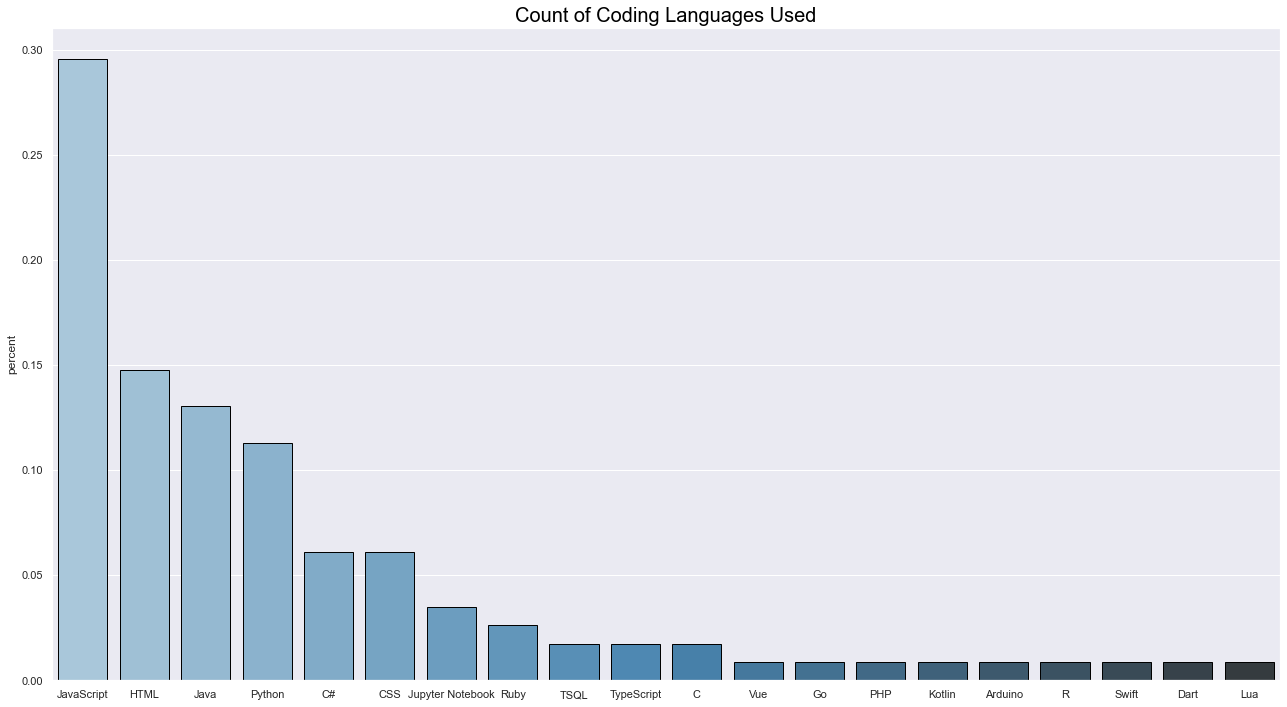

In [12]:
plt.figure(figsize=(22,12))
sns.set(style="darkgrid")
plt.title("Count of Coding Languages Used", size=20, color='black')
sns.barplot(y=languages.percent, x=languages.index, palette='Blues_d', edgecolor='black')
plt.show()

No handles with labels found to put in legend.


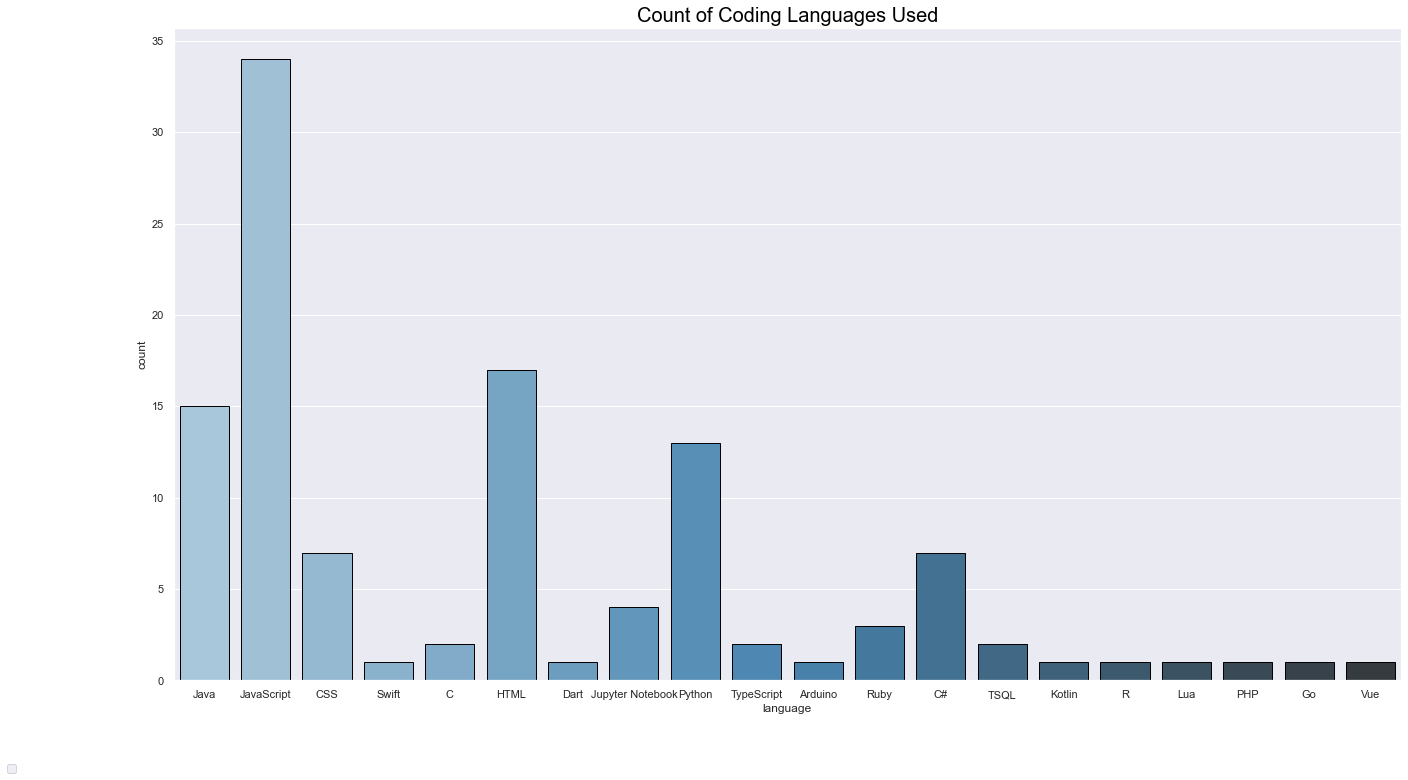

In [13]:
plt.figure(figsize=(22,12))
sns.set(style="darkgrid")
plt.title("Count of Coding Languages Used", size=20, color='black')
sns.countplot(x='language', data=dw,
               palette='Blues_d', edgecolor='black')
plt.legend(bbox_to_anchor=(-0.14, -0.15), loc='lower left')
plt.show()

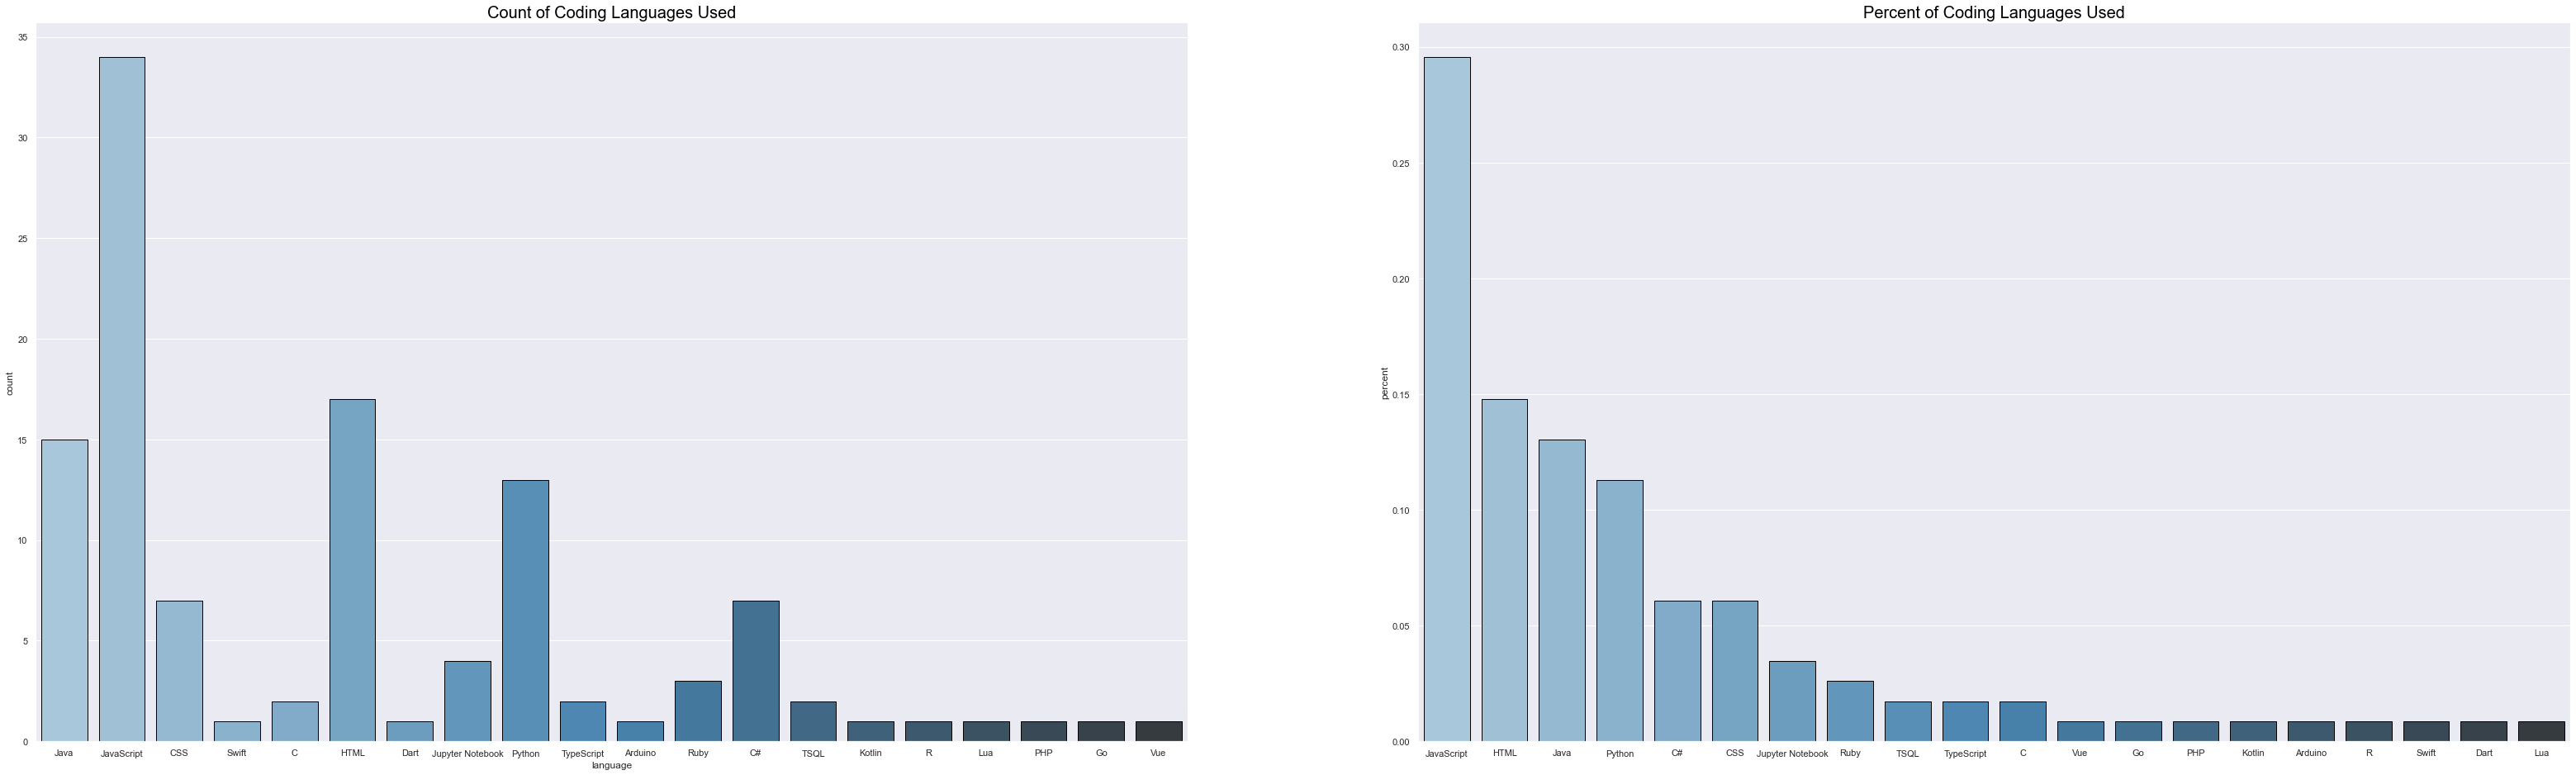

In [14]:
def plot_count_and_percent(dw):
    '''plots the number of times each language is used
    plot the percent that each language has been used'''
    # set the subplot information
    plt.subplots(1, 2, figsize=(55,16), sharey=True)
    sns.set(style="darkgrid")
    # create the count subplot
    plt.subplot(1,2,1)
    plt.title("Count of Coding Languages Used", size=20, color='black')
    sns.countplot(x='language', data=dw,
                   palette='Blues_d', edgecolor='black')
    # create the percentage subplot
    plt.subplot(1,2,2)
    plt.title("Percent of Coding Languages Used", size=20, color='black')
    sns.barplot(y=languages.percent, x=languages.index, palette='Blues_d', edgecolor='black')
    
plot_count_and_percent(dw)

## Takeaways:

- Top 5 languages: 
    - 29.56% of languages used are Java Script
        - This makes it the top used by a long shot
    - 14.78% of the languages used are HTML
    - 13.04% used Java
    - 6.09% use Python
    - 6.09% use C#

___

In [15]:
languages[:6]

,n,percent
JavaScript,34,0.295652
HTML,17,0.147826
Java,15,0.130435
Python,13,0.113043
C#,7,0.060870
CSS,7,0.060870


In [16]:
def seperate_top_six(dw):
    ''' takes in specified dataframe
    separates each language into their own string of words
    returns everything the top 6 languages'''
    # Separate the top 6 languages
    # Separate Java Script Words
    js_words = ' '.join(dw[dw.language == 'JavaScript'].all_clean)
    js_words = js_words.split()
    # Separate HTML Words
    html_words = ' '.join(dw[dw.language == 'HTML'].all_clean)
    html_words = html_words.split()
    # Separate Java Words
    java_words = ' '.join(dw[dw.language == 'Java'].all_clean)
    java_words = java_words.split()
    # Separate Python Words
    python_words = ' '.join(dw[dw.language == 'Python'].all_clean)
    python_words = python_words.split()
    # Separate C# Words
    cpound_words = ' '.join(dw[dw.language == 'C#'].all_clean)
    cpound_words = cpound_words.split()
    # Separate CSS Words
    css_words = ' '.join(dw[dw.language == 'CSS'].all_clean)
    css_words = css_words.split()
    return js_words, html_words, java_words, python_words, cpound_words, css_words
    
def string_for_all(dw):
    ''' takes in specified dataframe
    returns a string of all words found through all langages'''
    # create one for all words
    all_words = ' '.join(dw.all_clean)
    all_words = all_words.split()
    return all_words

def seperate_leftovers(dw):
    # seperate the remaining just in case
    ''' takes in specified dataframe
    separates each language into their own string of words
    returns everything but the top 6 languages'''
    # Separate CSS Words
    swift_words = ' '.join(dw[dw.language == 'Swift'].all_clean)
    swift_words = swift_words.split()
    # Separate CSS Words
    c_words = ' '.join(dw[dw.language == 'C'].all_clean)
    c_words = c_words.split()
    # Separate CSS Words
    dart_words = ' '.join(dw[dw.language == 'Dart'].all_clean)
    dart_words = dart_words.split()
    # Separate CSS Words
    jupyter_words = ' '.join(dw[dw.language == 'Jupyter Notebook'].all_clean)
    jupyter_words = jupyter_words.split()
    # Separate CSS Words
    script_words = ' '.join(dw[dw.language == 'TypeScript'].all_clean)
    script_words = script_words.split()
    # Separate CSS Words
    arduino_words = ' '.join(dw[dw.language == 'Arduino'].all_clean)
    arduino_words = arduino_words.split()
    # Separate CSS Words
    ruby_words = ' '.join(dw[dw.language == 'Ruby'].all_clean)
    ruby_words = ruby_words.split()
    # Separate CSS Words
    tsql_words = ' '.join(dw[dw.language == 'TSQL'].all_clean)
    tsql_words = tsql_words.split()
    # Separate CSS Words
    kotlin_words = ' '.join(dw[dw.language == 'Kotlin'].all_clean)
    kotlin_words = kotlin_words.split()
    # Separate CSS Words
    r_words = ' '.join(dw[dw.language == 'R'].all_clean)
    r_words = r_words.split()
    # Separate CSS Words
    lua_words = ' '.join(dw[dw.language == 'Lua'].all_clean)
    lua_words = lua_words.split()
    # Separate CSS Words
    php_words = ' '.join(dw[dw.language == 'PHP'].all_clean)
    php_words = php_words.split()
    # Separate CSS Words
    go_words = ' '.join(dw[dw.language == 'Go'].all_clean)
    go_words = go_words.split()
    # Separate CSS Words
    vue_words = ' '.join(dw[dw.language == 'Vue'].all_clean)
    vue_words = vue_words.split()
    # return them
    return swift_words, c_words, dart_words, jupyter_words, script_words, arduino_words, ruby_words, tsql_words, kotlin_words, r_words, lua_words, php_words, go_words, vue_words
    

In [17]:
js_words, html_words, java_words, python_words, cpound_words, css_words = seperate_top_six(dw)
all_words = string_for_all(dw)
swift_words, c_words, dart_words, jupyter_words, script_words, arduino_words, ruby_words, tsql_words, kotlin_words, r_words, lua_words, php_words, go_words, vue_words = seperate_leftovers(dw)

In [18]:
js_words[:5]

['web', 'app', 'reactive', 'core', 'architecture']

In [19]:
def top_six_freq(js_words, html_words, java_words, python_words, cpound_words, css_words):
    ''' takes in specified dataframe
    separates each language into their own string of words
    returns everything the top 6 languages'''
    # Separate the top 6 languages
    js_freq = pd.Series(js_words).value_counts()
    html_freq = pd.Series(html_words).value_counts()
    java_freq = pd.Series(java_words).value_counts()
    python_freq = pd.Series(python_words).value_counts()
    cpound_freq = pd.Series(cpound_words).value_counts()
    css_freq = pd.Series(css_words).value_counts()
    return js_freq, html_freq, java_freq, python_freq, cpound_freq, css_freq
    
    
def all_freq(all_words):
    ''' takes in specified dataframe
    returns a string of all freq found through all langages'''
    # create one for all freq
    all_freq = pd.Series(all_words).value_counts()
    return all_freq

def leftovers_freq(swift_words, c_words, dart_words, jupyter_words, script_words, arduino_words, ruby_words, tsql_words, kotlin_words, r_words, lua_words, php_words, go_words, vue_words):
    ''' takes in specified dataframe
    separates each language into their own string of freq
    returns everything but the top 6 languages'''
    # seperate the remaining just in case
    swift_freq = pd.Series(swift_words).value_counts()
    c_freq = pd.Series(c_words).value_counts()
    dart_freq = pd.Series(dart_words).value_counts()
    jupyter_freq = pd.Series(jupyter_words).value_counts()
    script_freq = pd.Series(script_words).value_counts()
    arduino_freq = pd.Series(arduino_words).value_counts()
    ruby_freq = pd.Series(ruby_words).value_counts()
    tsql_freq = pd.Series(tsql_words).value_counts()
    kotlin_freq = pd.Series(kotlin_words).value_counts()
    r_freq = pd.Series(r_words).value_counts()
    lua_freq = pd.Series(lua_words).value_counts()
    php_freq = pd.Series(php_words).value_counts()
    go_freq = pd.Series(go_words).value_counts()
    vue_freq = pd.Series(vue_words).value_counts()
    # return them
    return swift_freq, c_freq, dart_freq, jupyter_freq, script_freq, arduino_freq, ruby_freq, tsql_freq, kotlin_freq, r_freq, lua_freq, php_freq, go_freq, vue_freq
    

In [20]:
js_freq, html_freq, java_freq, python_freq, cpound_freq, css_freq = top_six_freq(js_words, html_words, java_words, python_words, cpound_words, css_words)
all_freq = all_freq(all_words)
swift_freq, c_freq, dart_freq, jupyter_freq, script_freq, arduino_freq, ruby_freq, tsql_freq, kotlin_freq, r_freq, lua_freq, php_freq, go_freq, vue_freq = leftovers_freq(swift_words, c_words, dart_words, jupyter_words, script_words, arduino_words, ruby_words, tsql_words, kotlin_words, r_words, lua_words, php_words, go_words, vue_words)

In [21]:
js_words[:5]

['web', 'app', 'reactive', 'core', 'architecture']

In [22]:
html_freq

baker                40
tom                  34
pertwee              19
jon                  19
netflixamazonhulu    16
                     ..
monster               1
missed                1
want                  1
images                1
collaborate           1
Length: 422, dtype: int64

In [23]:
word_counts = (pd.concat([all_freq, js_freq, html_freq, java_freq, python_freq, 
                          cpound_freq, css_freq, swift_freq, c_freq, dart_freq, 
                          jupyter_freq, script_freq, arduino_freq, ruby_freq, 
                          tsql_freq, kotlin_freq, r_freq, lua_freq, php_freq, 
                          go_freq, vue_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'html', 'java', 'python', 'c#', 'css', 
                          'swift', 'c', 'dart', 'jupyter', 'script', 'arduino', 'ruby', 
                          'tsql', 'kotlin', 'r', 'lua', 'php', 'go', 'vue'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,html,java,python,c#,css,swift,c,dart,...,script,arduino,ruby,tsql,kotlin,r,lua,php,go,vue
build,272,262,1,2,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
npm,265,260,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,3
app,263,258,0,1,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
run,249,227,0,1,8,2,0,0,2,0,...,1,0,2,0,0,0,2,0,0,2
react,224,223,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
project,187,155,2,1,5,1,11,0,1,2,...,0,0,0,0,0,1,1,1,0,1
file,160,140,1,3,3,8,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0
using,153,131,3,6,3,1,2,0,1,0,...,0,3,0,0,0,0,1,0,0,0
create,147,127,1,12,0,4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
test,138,131,0,3,2,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [24]:
js_words[:5]

['web', 'app', 'reactive', 'core', 'architecture']

___

## Explore Java Script Words

In [25]:
def top_20_js(js_words):
    'print the top 20 words used in java script'
    print(js_words[:20])
    
top_20_js(js_words)

['web', 'app', 'reactive', 'core', 'architecture', 'demo', 'application', 'web', 'app', 'demo', 'reactive', 'core', 'architecture', 'explained', 'article', 'httpsgooglun3qpk', 'architecture', 'overview', 'reactive', 'core']


In [26]:
#js_words = ' '.join(js_words)

In [27]:
def js_words_cloud(js_words):
    '''takes in words found in java script readme files
    creates a word cloud out of the words on their own'''
    # make js_words into string format
    js_words = ' '.join(js_words)
    #plt.figure(figsize=(16,8))
    # set the mask to change the shape
    mask = np.array(Image.open('/Users/caitlyncarney/masks/cyber_sil.jpeg'))
    # create the word cloud
    img = WordCloud(background_color="black", mask=mask, max_words=2000, 
                    contour_color='white', contour_width=70,
                    stopwords=STOPWORDS, max_font_size=156,
                    random_state=42, width=1000, height=800, colormap='Blues').generate(js_words)
    plt.imshow(img)
    plt.axis('off')

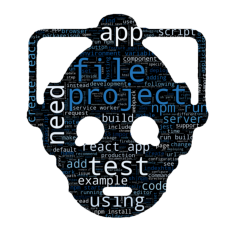

In [28]:
js_words_cloud(js_words)

### Bigrams

In [29]:
#js_bigrams = (pd.Series(nltk.ngrams(js_words.split(), 2)).value_counts().head(30))

In [30]:
def js_bi_bar(js_words):
    '''create bigrams for the words used in java script
    create a bar graph to see the top used word combos'''
    # turn into a string
    js_words = ' '.join(js_words)
    # create the bigram
    js_bigrams = (pd.Series(nltk.ngrams(js_words.split(), 2)).value_counts().head(30))
    # make the plot
    plt.figure(figsize=(25,13))
    # set to dark background
    sns.set(style="dark")
    # make the bar graph
    js_bigrams.sort_values().plot.barh(color='royalblue', ec='black', width=.9, figsize=(10, 6))
    # name the title and labels
    plt.title('20 Most Frequently Occuring Java Script Bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')
    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = js_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    plt.show()

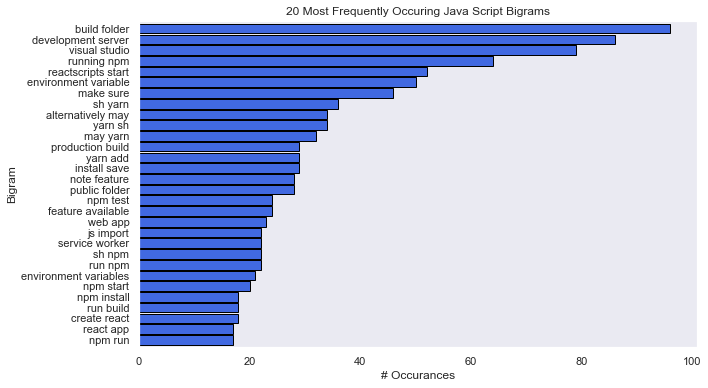

In [31]:
js_bi_bar(js_words)

In [32]:
def js_bi_cloud(js_words):
    '''create word clouds out of the top bigrams'''
    # make into string
    js_words = ' '.join(js_words)
    # create bigrams
    js_bigrams = (pd.Series(nltk.ngrams(js_words.split(), 2)).value_counts().head(30))
    # make the plot
    #plt.figure(figsize=(16,8))
    # set bigrams to a value
    data = {k[0] + ' ' + k[1]: v for k, v in js_bigrams.to_dict().items()}
    # make the mask to change the shape
    mask = np.array(Image.open('/Users/caitlyncarney/masks/cyber_sil.jpeg'))
    # make the wordcloud
    img = WordCloud(background_color="black", mask=mask, max_words=2000, 
                    contour_color='white', contour_width=70,
                    stopwords=STOPWORDS, max_font_size=156,
                    random_state=42, width=1000, height=800, colormap='Blues').generate_from_frequencies(data)
    plt.imshow(img)
    plt.axis('off')

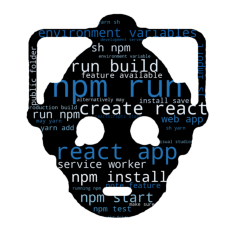

In [33]:
js_bi_cloud(js_words)

In [34]:
def top_20_js_bi(js_words):
    '''print the top 20 bigrams used in java script'''
    # change to string format
    js_words = ' '.join(js_words)
    # make bigram
    js_bigrams = (pd.Series(nltk.ngrams(js_words.split(), 2)).value_counts().head(30))
    # print the top 20
    print(js_bigrams[:20])
    
top_20_js_bi(js_words)

(npm, run)                  96
(react, app)                86
(create, react)             79
(run, build)                64
(npm, install)              52
(npm, start)                50
(environment, variables)    46
(run, npm)                  36
(sh, npm)                   34
(service, worker)           34
(js, import)                32
(web, app)                  29
(feature, available)        29
(npm, test)                 29
(public, folder)            28
(note, feature)             28
(install, save)             24
(yarn, add)                 24
(production, build)         23
(may, yarn)                 22
dtype: int64


___

## Explore HTML Words

In [35]:
def top_20_html(html_words):
    '''print out top 20 words used in html'''
    # pritn top 20
    print(html_words[:20])
    
top_20_html(html_words)

['cvdoctorwho', 'projet', '1', 'de', 'la', 'session', 'mars', '2020', 'de', 'la', 'wild', 'code', 'school', 'demo', 'voir', 'la', 'demohttpstobecontinuedgithubioorleansphp2003projectdoctorwho', 'wilders', 'ayants', 'participe']


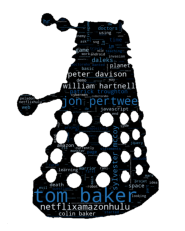

In [36]:
def html_words_cloud(html_words):
    '''create word cloud to hold html words'''
    # change to string
    html_words = ' '.join(html_words)
    #plt.figure(figsize=(16,8))
    # set mask to change shape
    mask = np.array(Image.open('/Users/caitlyncarney/masks/dalek_sil.jpeg'))
    # create word cloud
    img = WordCloud(background_color="black", mask=mask, max_words=2000, 
                    contour_color='white', contour_width=20,
                    stopwords=STOPWORDS, max_font_size=156,
                    random_state=42, width=1000, height=800, colormap='Blues').generate(html_words)
    plt.imshow(img)

    plt.axis('off')
    
html_words_cloud(html_words)

### Bigrams

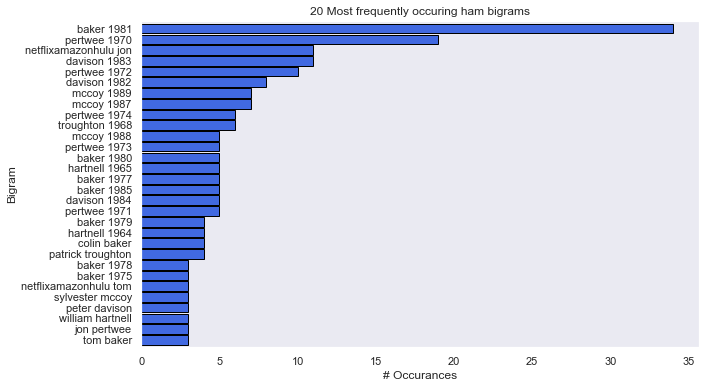

In [37]:
def html_bi_bar(html_words):
    '''create bar graph
    show most frequently used word combos in html'''
    # change to string
    html_words = ' '.join(html_words)
    # create bigramss
    html_bigrams = (pd.Series(nltk.ngrams(html_words.split(), 2)).value_counts().head(30))
    # make plot
    plt.figure(figsize=(25,13))
    # set to dark background
    sns.set(style="dark")
    # make bar plot
    html_bigrams.sort_values().plot.barh(color='royalblue', ec='black', width=.9, figsize=(10, 6))
    # change title and label names
    plt.title('20 Most frequently occuring ham bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')
    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = html_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    
html_bi_bar(html_words)

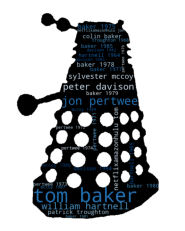

In [38]:
def html_bi_cloud(html_words):
    '''create word cloud to hold most frequent word combos'''
    # change to string
    html_words = ' '.join(html_words)
    # create bigrams
    html_bigrams = (pd.Series(nltk.ngrams(html_words.split(), 2)).value_counts().head(30))
    # create plot
    #plt.figure(figsize=(16,8))
    # set bigrams to value
    data = {k[0] + ' ' + k[1]: v for k, v in html_bigrams.to_dict().items()}
    # make mask to change the shape
    mask = np.array(Image.open('/Users/caitlyncarney/masks/dalek_sil.jpeg'))
    # create word cloud
    img = WordCloud(background_color="black", mask=mask, max_words=2000, 
                    contour_color='white', contour_width=20,
                    stopwords=STOPWORDS, max_font_size=156,
                    random_state=42, width=1000, height=800, colormap='Blues').generate_from_frequencies(data)
    plt.imshow(img)
    plt.axis('off')
    
html_bi_cloud(html_words)

In [39]:
def top_20_html_bi(html_words):
    '''print out top 20 word combos used in html'''
    # turn into string format
    html_words = ' '.join(html_words)
    # create bigram
    html_bigrams = (pd.Series(nltk.ngrams(html_words.split(), 2)).value_counts().head(30))
    # print top 20
    print(html_bigrams[:20])
    
top_20_html_bi(html_words)

(tom, baker)                34
(jon, pertwee)              19
(william, hartnell)         11
(peter, davison)            11
(sylvester, mccoy)          10
(netflixamazonhulu, tom)     8
(baker, 1975)                7
(baker, 1978)                7
(patrick, troughton)         6
(colin, baker)               6
(hartnell, 1964)             5
(baker, 1979)                5
(pertwee, 1971)              5
(davison, 1984)              5
(baker, 1985)                5
(baker, 1977)                5
(hartnell, 1965)             5
(baker, 1980)                5
(pertwee, 1973)              4
(mccoy, 1988)                4
dtype: int64


<Figure size 1152x576 with 0 Axes>

___

## Explore Java Words

In [40]:
def top_20_java(java_words):
    '''print out the top 20 words used in java script'''
    # print top 20
    print(java_words[:20])
    
top_20_java(java_words)

['spigot', 'paper', 'plugin', 'allows', 'create', 'lets', 'time', 'travel', 'teleport', 'random', 'locations', 'adds', 'whovian', 'twist', 'typical', 'sethome', 'home', 'commands', 'player', 'create']


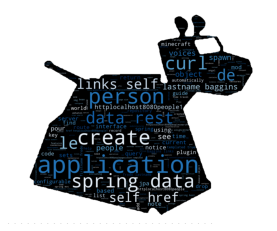

In [41]:
def java_words_cloud(java_words):
    '''create word cloud for words foudn in java'''
    # string format
    java_words = ' '.join(java_words)
    # make mask to change shape
    mask = np.array(Image.open('/Users/caitlyncarney/masks/k9.jpeg'))
    # create word cloud
    img = WordCloud(background_color="black", mask=mask, max_words=2000,
                    contour_color='white', contour_width=20,
                    stopwords=STOPWORDS, max_font_size=256,
                    random_state=42, width=1000, height=800, colormap='Blues').generate(java_words)
    plt.imshow(img)
    plt.axis('off')
    
java_words_cloud(java_words)

### Bigrams

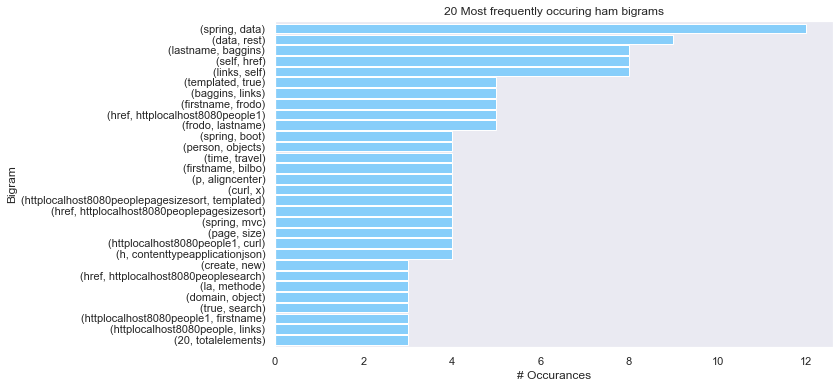

In [66]:
def java_bi_bar(java_words):
    '''take in java words
    plot bar graoph to show top word combos'''
    # string format
    java_words = ' '.join(java_words)
    # create bigrams
    java_bigrams = (pd.Series(nltk.ngrams(java_words.split(), 2)).value_counts().head(30))
    # make the plot
    plt.figure(figsize=(16,8))
    sns.set(style="dark")
    java_bigrams.sort_values().plot.barh(color='lightskyblue',  width=.9, figsize=(10, 6))
    # name the plot and labels
    plt.title('20 Most frequently occuring ham bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    
java_bi_bar(java_words)

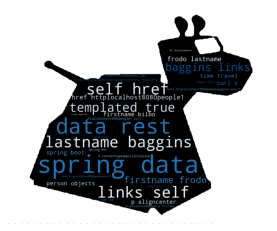

In [43]:
def java_bi_cloud(java_words):
    '''make wordloud for words found in java language'''
    # string format
    java_words = ' '.join(java_words)
    # create bigrams
    java_bigrams = (pd.Series(nltk.ngrams(java_words.split(), 2)).value_counts().head(30))
    # set bigram as a variable
    data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
    # set mask to change shape
    mask = np.array(Image.open('/Users/caitlyncarney/masks/k9.jpeg'))
    img = WordCloud(background_color="black", mask=mask, max_words=2000, 
                    contour_color='white', contour_width=20,
                    stopwords=STOPWORDS, max_font_size=156,
                    random_state=42, width=1000, height=800, colormap='Blues').generate_from_frequencies(data)
    plt.imshow(img)
    plt.axis('off')
    
java_bi_cloud(java_words)

In [44]:
def top_20_java_bi(java_words):
    '''print top 20 word combos used in java'''
    # string format
    java_words = ' '.join(java_words)
    # create bigram
    java_bigrams = (pd.Series(nltk.ngrams(java_words.split(), 2)).value_counts().head(30))
    # print top 20
    print(java_bigrams[:20])
    
top_20_java_bi(java_words)

(spring, data)                                      12
(data, rest)                                         9
(lastname, baggins)                                  8
(self, href)                                         8
(links, self)                                        8
(templated, true)                                    5
(baggins, links)                                     5
(firstname, frodo)                                   5
(href, httplocalhost8080people1)                     5
(frodo, lastname)                                    5
(person, objects)                                    4
(time, travel)                                       4
(firstname, bilbo)                                   4
(spring, boot)                                       4
(p, aligncenter)                                     4
(curl, x)                                            4
(httplocalhost8080peoplepagesizesort, templated)     4
(href, httplocalhost8080peoplepagesizesort)          4
(spring, m

___

## Explore Python Words

In [45]:
def top_20_python(python_words):
    '''print top 20 words used in html'''
    # print top 20
    print(python_words[:20])
    
top_20_python(python_words)

['whoscript', 'whothemed', 'esoteric', 'programming', 'language', 'interpreter', 'documentation', 'httpwwwesolangsorgwikiwhoscript', 'installation', 'instructions', 'httpmetacodegolfstackexchangecoma784148457', 'doctordata', 'image', 'doctordatahttpmedical3danimationcompanycomwpcontentuploadssurgical3dmedicalanimationdoctorrenderingcharactermascotsanantoniohealthcare3dvisualization284x300png', 'project', 'focuses', 'prediction', 'details', 'along', 'location']


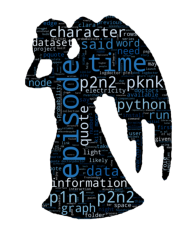

In [46]:
def python_words_cloud(python_words):
    ''''''
    python_words = ' '.join(python_words)
    #plt.figure(figsize=(16,8))
    mask = np.array(Image.open('/Users/caitlyncarney/masks/angel_sil.jpeg'))
    image_colors = ImageColorGenerator(mask)
    img = WordCloud(background_color="black", mask=mask, max_words=2000, 
                    contour_color='white', contour_width=50,
                    stopwords=STOPWORDS, max_font_size=156,
                    random_state=42, width=1000, height=800, colormap='Blues').generate(python_words)
    plt.imshow(img)

    plt.axis('off')
    
python_words_cloud(python_words)

### Bigrams

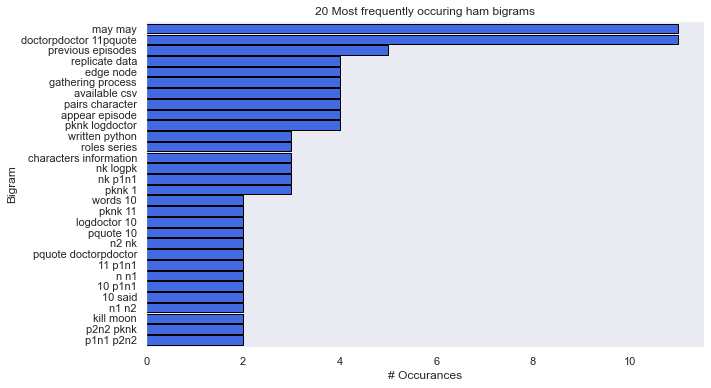

In [47]:
def python_bi_bar(python_words):
    python_words = ' '.join(python_words)
    python_bigrams = (pd.Series(nltk.ngrams(python_words.split(), 2)).value_counts().head(30))
    plt.figure(figsize=(25,13))
    sns.set(style="dark")
    python_bigrams.sort_values().plot.barh(color='royalblue', ec='black', width=.9, figsize=(10, 6))

    plt.title('20 Most frequently occuring ham bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    
python_bi_bar(python_words)

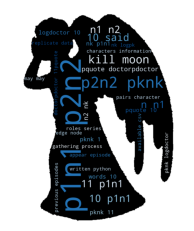

In [48]:
def python_bi_cloud(python_words):
    python_words = ' '.join(python_words)
    python_bigrams = (pd.Series(nltk.ngrams(python_words.split(), 2)).value_counts().head(30))
    #plt.figure(figsize=(16,8))
    data = {k[0] + ' ' + k[1]: v for k, v in python_bigrams.to_dict().items()}
    mask = np.array(Image.open('/Users/caitlyncarney/masks/angel_sil.jpeg'))
    img = WordCloud(background_color="black", mask=mask, max_words=2000, 
                    contour_color='white', contour_width=20,
                    stopwords=STOPWORDS, max_font_size=156,
                    random_state=42, width=1000, height=800, colormap='Blues').generate_from_frequencies(data)
    plt.imshow(img)
    plt.axis('off')
    
python_bi_cloud(python_words)

In [49]:
def top_20_python_bi(python_words):
    '''print top 20 word combos used in pandas'''
    # string format
    python_words = ' '.join(python_words)
    # create bigrams
    python_bigrams = (pd.Series(nltk.ngrams(python_words.split(), 2)).value_counts().head(30))
    # print top 20
    print(python_bigrams[:20])
    
top_20_python_bi(python_words)

(p1n1, p2n2)                 11
(p2n2, pknk)                 11
(kill, moon)                  5
(n1, n2)                      4
(10, said)                    4
(10, p1n1)                    4
(n, n1)                       4
(11, p1n1)                    4
(pquote, doctorpdoctor)       4
(n2, nk)                      4
(pquote, 10)                  3
(logdoctor, 10)               3
(pknk, 11)                    3
(words, 10)                   3
(pknk, 1)                     3
(nk, p1n1)                    3
(nk, logpk)                   2
(characters, information)     2
(roles, series)               2
(written, python)             2
dtype: int64


## Explore All Words

In [50]:
def top_20_of_all(all_words):
    '''print top 20 words out of all langages'''
    # print top 20
    print(all_words[:20])
    
top_20_of_all(all_words)

['spigot', 'paper', 'plugin', 'allows', 'create', 'lets', 'time', 'travel', 'teleport', 'random', 'locations', 'adds', 'whovian', 'twist', 'typical', 'sethome', 'home', 'commands', 'player', 'create']


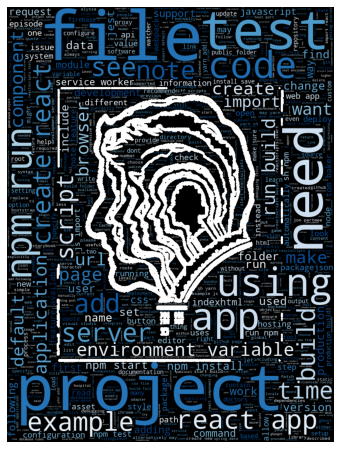

In [51]:
def all_words_cloud(all_words):
    all_words = ' '.join(all_words)
    plt.figure(figsize=(16,8))
    mask = np.array(Image.open('/Users/caitlyncarney/masks/all_docs.jpg'))
    image_colors = ImageColorGenerator(mask)
    img = WordCloud(background_color="black", mask=mask, max_words=2000, 
                    contour_color='white', contour_width=5,
                    stopwords=STOPWORDS, max_font_size=156,
                    random_state=42, width=1000, height=800, colormap='Blues').generate(all_words)
    plt.imshow(img)

    plt.axis('off')
    
all_words_cloud(all_words)

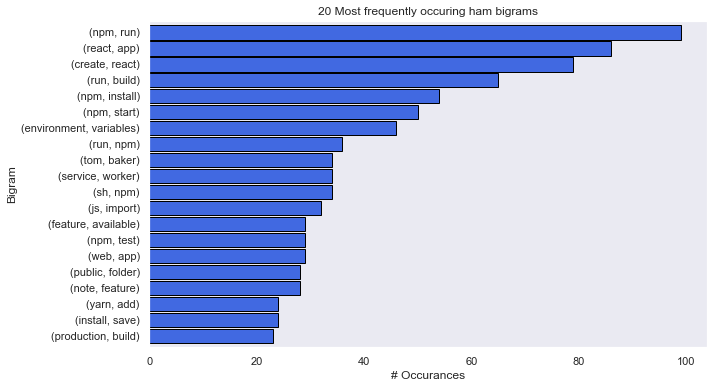

In [52]:
def all_bi_bar(all_words):
    all_words = ' '.join(all_words)
    all_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(20))
    plt.figure(figsize=(25,13))
    sns.set(style="dark")
    all_bigrams.sort_values().plot.barh(color='royalblue', ec='black', width=.9, figsize=(10, 6))

    plt.title('20 Most frequently occuring ham bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

all_bi_bar(all_words)

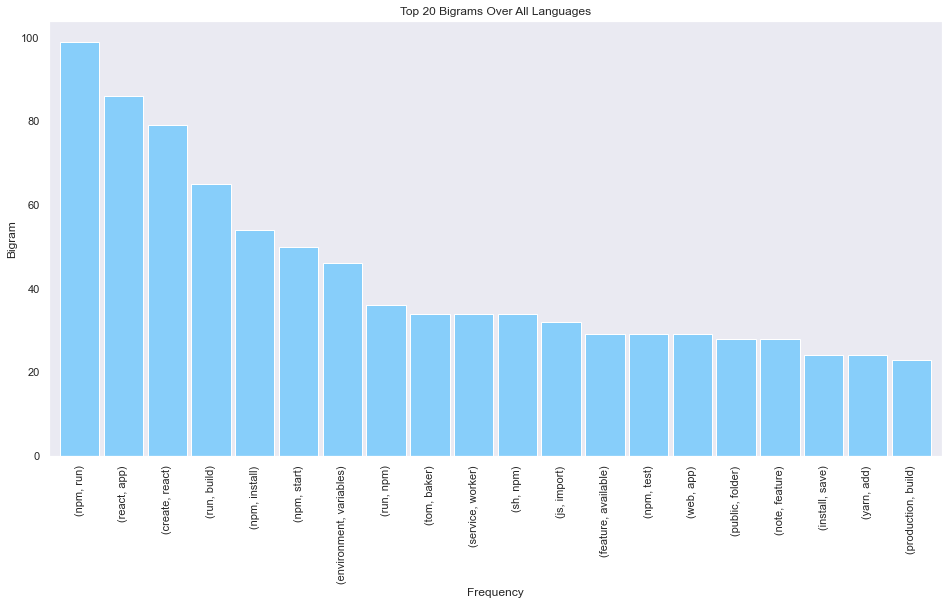

In [53]:
def all_bigrams_bar(all_words):
    all_words = ' '.join(all_words)
    all_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(20))
    plt.figure(figsize=(16,8))
    sns.set(style="dark")
    all_bigrams.plot.bar(color='lightskyblue', width=.9)
    plt.title("Top 20 Bigrams Over All Languages")
    plt.ylabel("Bigram")
    plt.xlabel("Frequency")
    plt.show()
all_bigrams_bar(all_words)

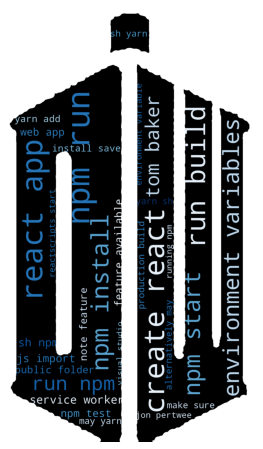

In [68]:
def all_bi_cloud(all_words):
    all_words = ' '.join(all_words)
    all_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(30))
    plt.figure(figsize=(16,8))
    data = {k[0] + ' ' + k[1]: v for k, v in all_bigrams.to_dict().items()}
    mask = np.array(Image.open('/Users/caitlyncarney/masks/blue_dw.jpeg'))
    img = WordCloud(background_color="black", mask=mask, max_words=2000, 
                    contour_color='white', contour_width=70,
                    stopwords=STOPWORDS, max_font_size=156,
                    random_state=42, width=1000, height=800, colormap='Blues').generate_from_frequencies(data)
    plt.imshow(img)
    plt.axis('off')
    
all_bi_cloud(all_words)

In [54]:
def top_20_of_all_bi(all_words):
    '''print top 20 word combos used throughtout all coding languages'''
    # string format
    all_words = ' '.join(all_words)
    # create bigrams
    all_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(30))
    # print top 20
    print(all_bigrams[:20])
    
top_20_of_all_bi(all_words)

(npm, run)                  99
(react, app)                86
(create, react)             79
(run, build)                65
(npm, install)              54
(npm, start)                50
(environment, variables)    46
(run, npm)                  36
(tom, baker)                34
(service, worker)           34
(sh, npm)                   34
(js, import)                32
(feature, available)        29
(npm, test)                 29
(web, app)                  29
(public, folder)            28
(note, feature)             28
(install, save)             24
(yarn, add)                 24
(production, build)         23
dtype: int64


___

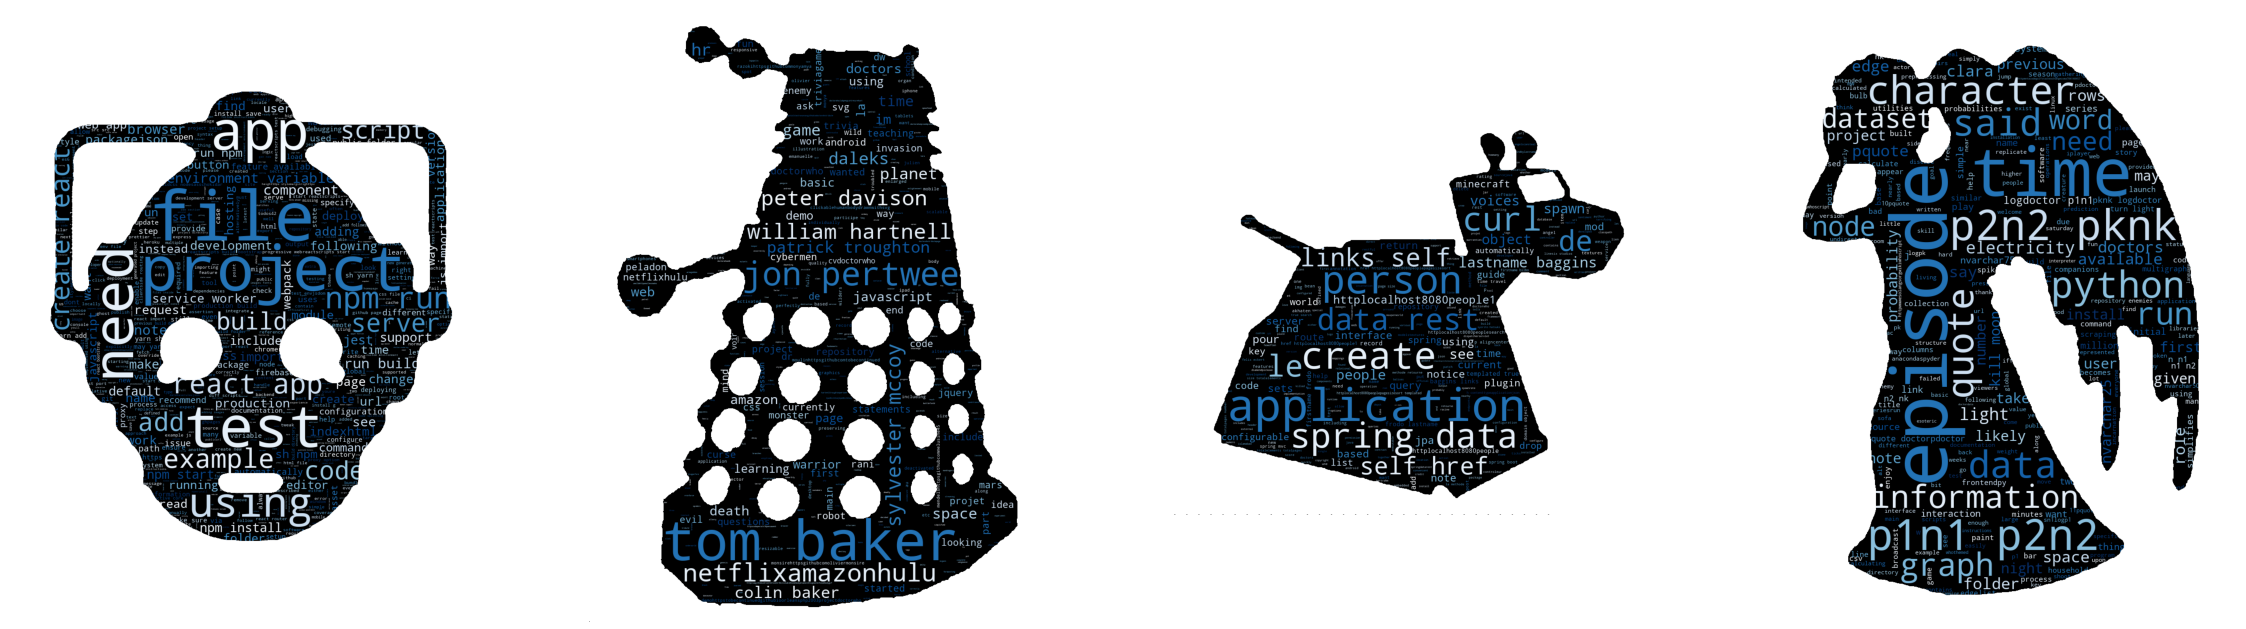

In [55]:
def compare_single_clouds(js_words, html_words, java_words, python_words):
    plt.subplots(1, 4, figsize=(40,16), sharey=True)
    sns.set(style="darkgrid")

    plt.subplot(1,4,1)
    js_words_cloud(js_words)

    plt.subplot(1,4,2)
    html_words_cloud(html_words)

    plt.subplot(1,4,3)
    java_words_cloud(java_words)

    plt.subplot(1,4,4)
    python_words_cloud(python_words)

compare_single_clouds(js_words, html_words, java_words, python_words)

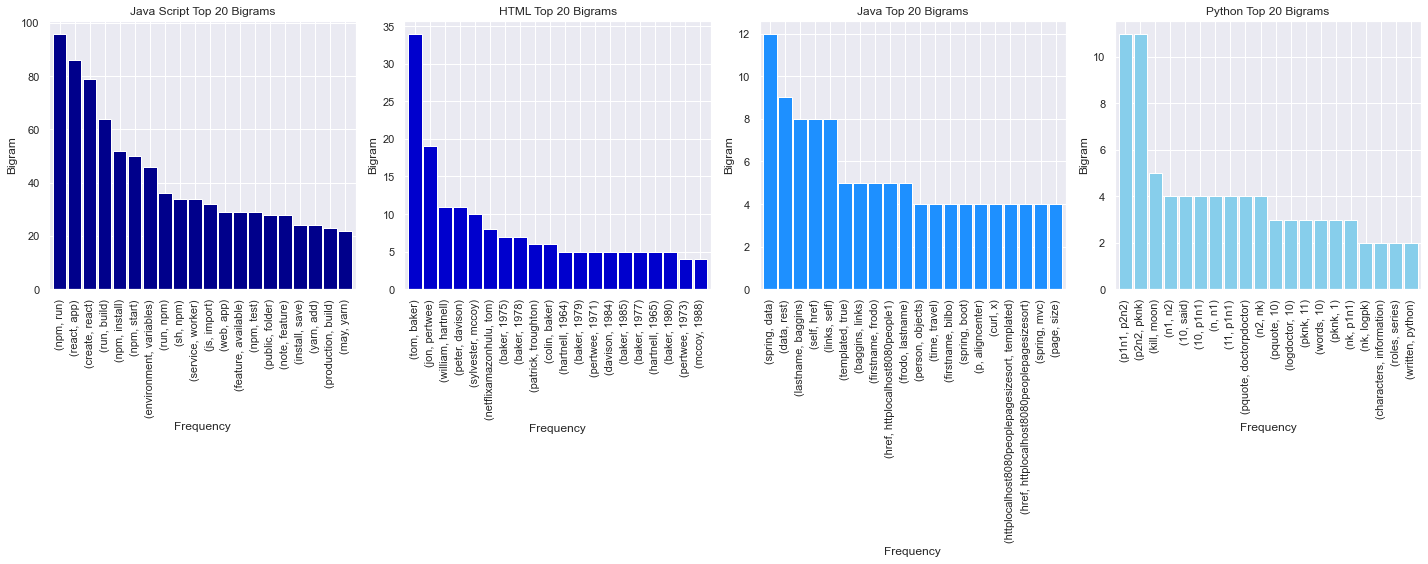

In [56]:
def compare_bigrams(js_words, html_words, java_words, python_words):
    '''takes in words from top 4 coding languages
    makes a bigram for each of the 4 languages
    plots a bar graph to show frequency of each of the top 20 word combos used'''
    # change to string format and create needed bigrams
    js_words = ' '.join(js_words)
    js_bigrams = (pd.Series(nltk.ngrams(js_words.split(), 2)).value_counts().head(20))
    html_words = ' '.join(html_words)
    html_bigrams = (pd.Series(nltk.ngrams(html_words.split(), 2)).value_counts().head(20))
    java_words = ' '.join(java_words)
    java_bigrams = (pd.Series(nltk.ngrams(java_words.split(), 2)).value_counts().head(20))
    python_words = ' '.join(python_words)
    python_bigrams = (pd.Series(nltk.ngrams(python_words.split(), 2)).value_counts().head(20))
    # set up for subplotting
    plt.subplots(1,4, figsize=(20,8), sharey=True)
    sns.set(style="darkgrid")
    # create plot for java script
    plt.subplot(1,4,1)
    js_bigrams.plot.bar(color='darkblue', width=.9)
    plt.title("Java Script Top 20 Bigrams")
    plt.ylabel("Bigram")
    plt.xlabel("Frequency")
    # create plot for HTML
    plt.subplot(1,4,2)
    html_bigrams.plot.bar(color='mediumblue', width=.9)
    plt.title("HTML Top 20 Bigrams")
    plt.ylabel("Bigram")
    plt.xlabel("Frequency")
    # create plot for Java
    plt.subplot(1,4,3)
    java_bigrams.plot.bar(color='dodgerblue', width=.9)
    plt.title("Java Top 20 Bigrams")
    plt.ylabel("Bigram")
    plt.xlabel("Frequency")
    # create plot for Python
    plt.subplot(1,4,4)
    python_bigrams.plot.bar(color='skyblue', width=.9)
    plt.title("Python Top 20 Bigrams")
    plt.ylabel("Bigram")
    plt.xlabel("Frequency")
    # make it shine
    plt.tight_layout()
    plt.show()

compare_bigrams(js_words, html_words, java_words, python_words)

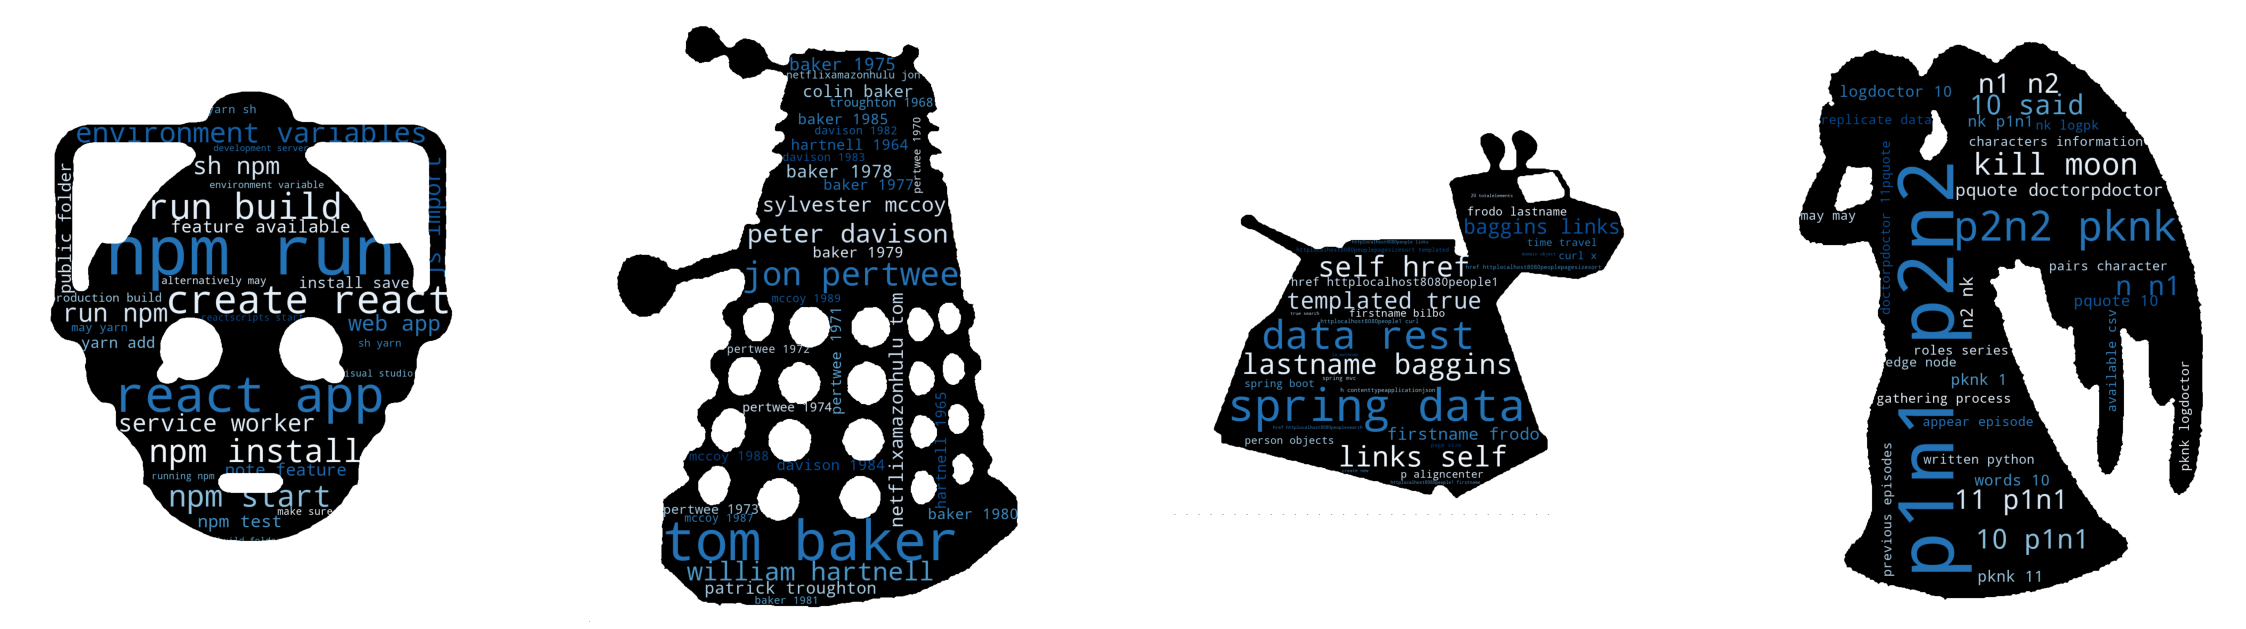

In [57]:
def compare_bigram_clouds(js_words, html_words, java_words, python_words):
    plt.subplots(1, 4, figsize=(40,16), sharey=True)
    sns.set(style="darkgrid")
    
    plt.subplot(1,4,1)
    js_bi_cloud(js_words)

    plt.subplot(1,4,2)
    html_bi_cloud(html_words)
    
    plt.subplot(1,4,3)
    java_bi_cloud(java_words)
    
    plt.subplot(1,4,4)
    python_bi_cloud(python_words)

compare_bigram_clouds(js_words, html_words, java_words, python_words)

# The End of Exploration